In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go
import folium
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
import plotly.express as px

In [22]:
df = pd.read_csv('globalterrorismdb_0718dist.csv')

C:\Users\LENOVO\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.



In [23]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [24]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [25]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
tar = df.country_txt.value_counts().reset_index()
tar.dropna(inplace=True)

In [27]:
a = df['country_txt'].dropna()
a.isna().sum()

0

In [29]:
df1 = df[['country_txt','latitude','longitude']]
df1.head()
df1.dropna(inplace=True)
df1.isna().sum()

<ipython-input-29-b0b613909e53>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



country_txt    0
latitude       0
longitude      0
dtype: int64

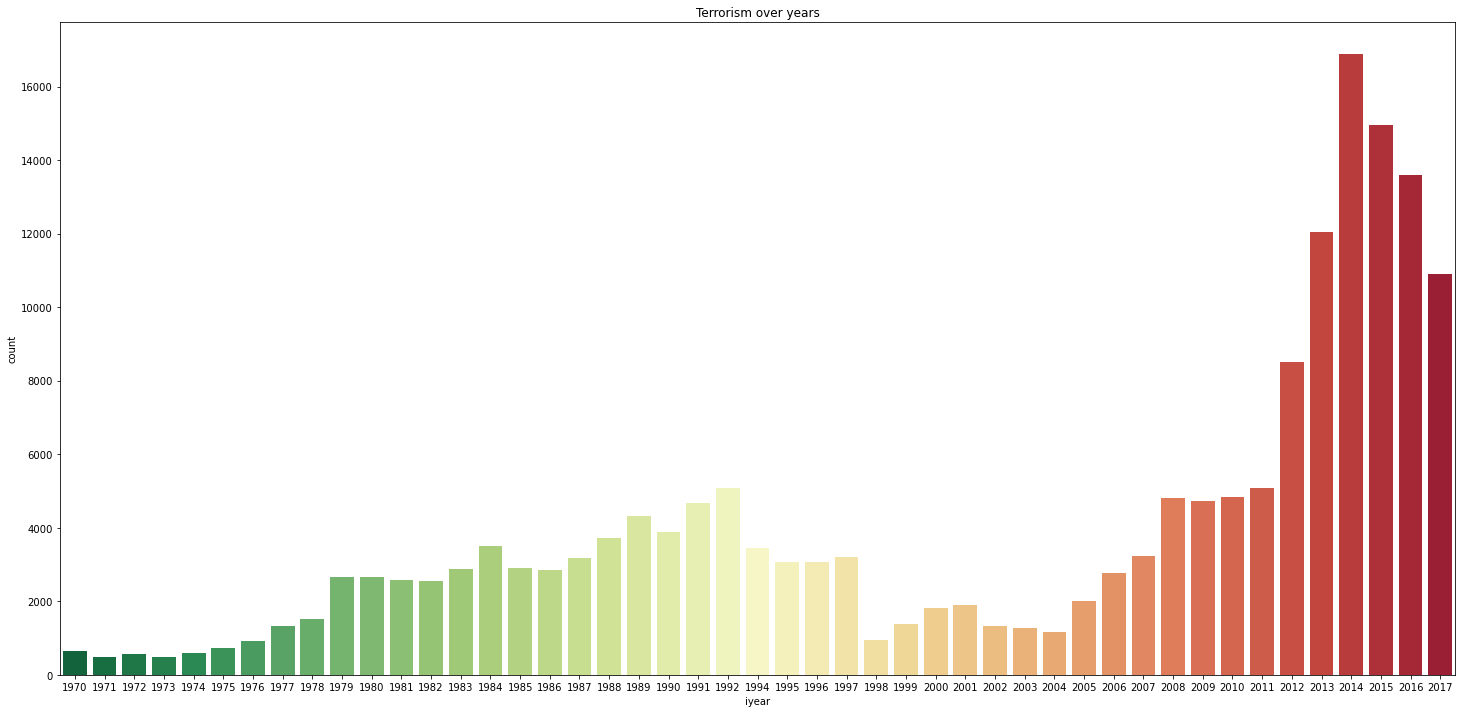

In [45]:
plt.subplots(figsize=(25,12))
sns.countplot(x=df['iyear'],palette='RdYlGn_r')
plt.title('Terrorism over years')
plt.show()

In [31]:
attacks = df.country_txt.value_counts()[:15].reset_index()
attacks

,index,country_txt
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306
5,Philippines,6908
6,Peru,6096
7,El Salvador,5320
8,United Kingdom,5235
9,Turkey,4292


Text(0.5, 1.0, 'Most terrorist attacks on countries')

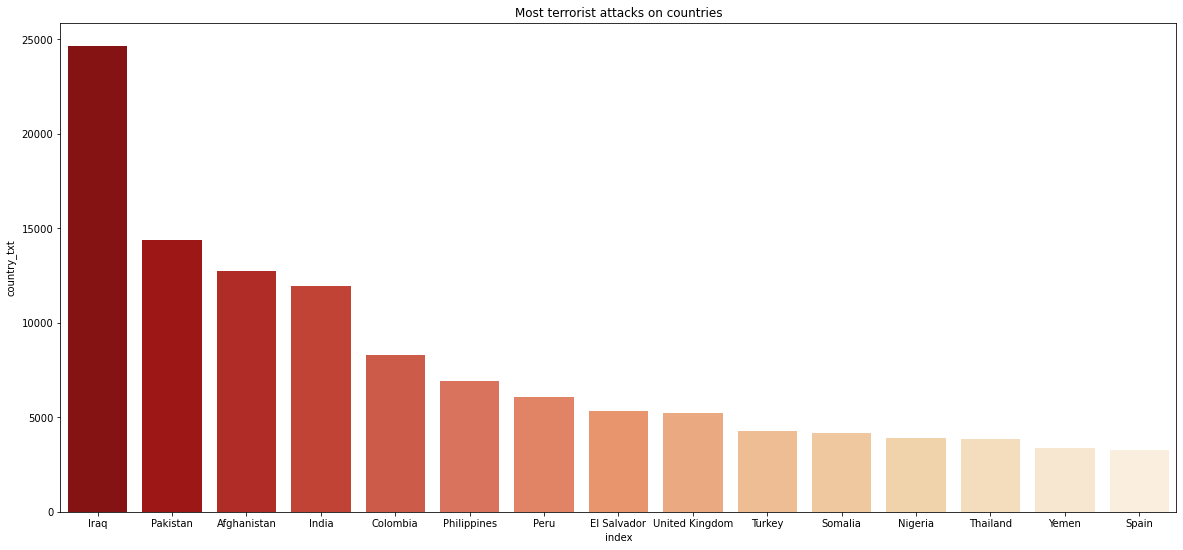

In [46]:
plt.figure(figsize=(20,9))
sns.barplot(x=attacks['index'],y=attacks['country_txt'],palette='OrRd_r')
plt.title('Most terrorist attacks on countries')

Iraq and pakistan are the country which have most number of terrorist attacks

In [33]:
target = df.targtype1_txt.value_counts().reset_index()
target

,index,targtype1_txt
0,Private Citizens & Property,43511
1,Military,27984
2,Police,24506
3,Government (General),21283
4,Business,20669
5,Transportation,6799
6,Utilities,6023
7,Unknown,5898
8,Religious Figures/Institutions,4440
9,Educational Institution,4322


Text(0.5, 1.0, 'Most prone areas to be attacked')

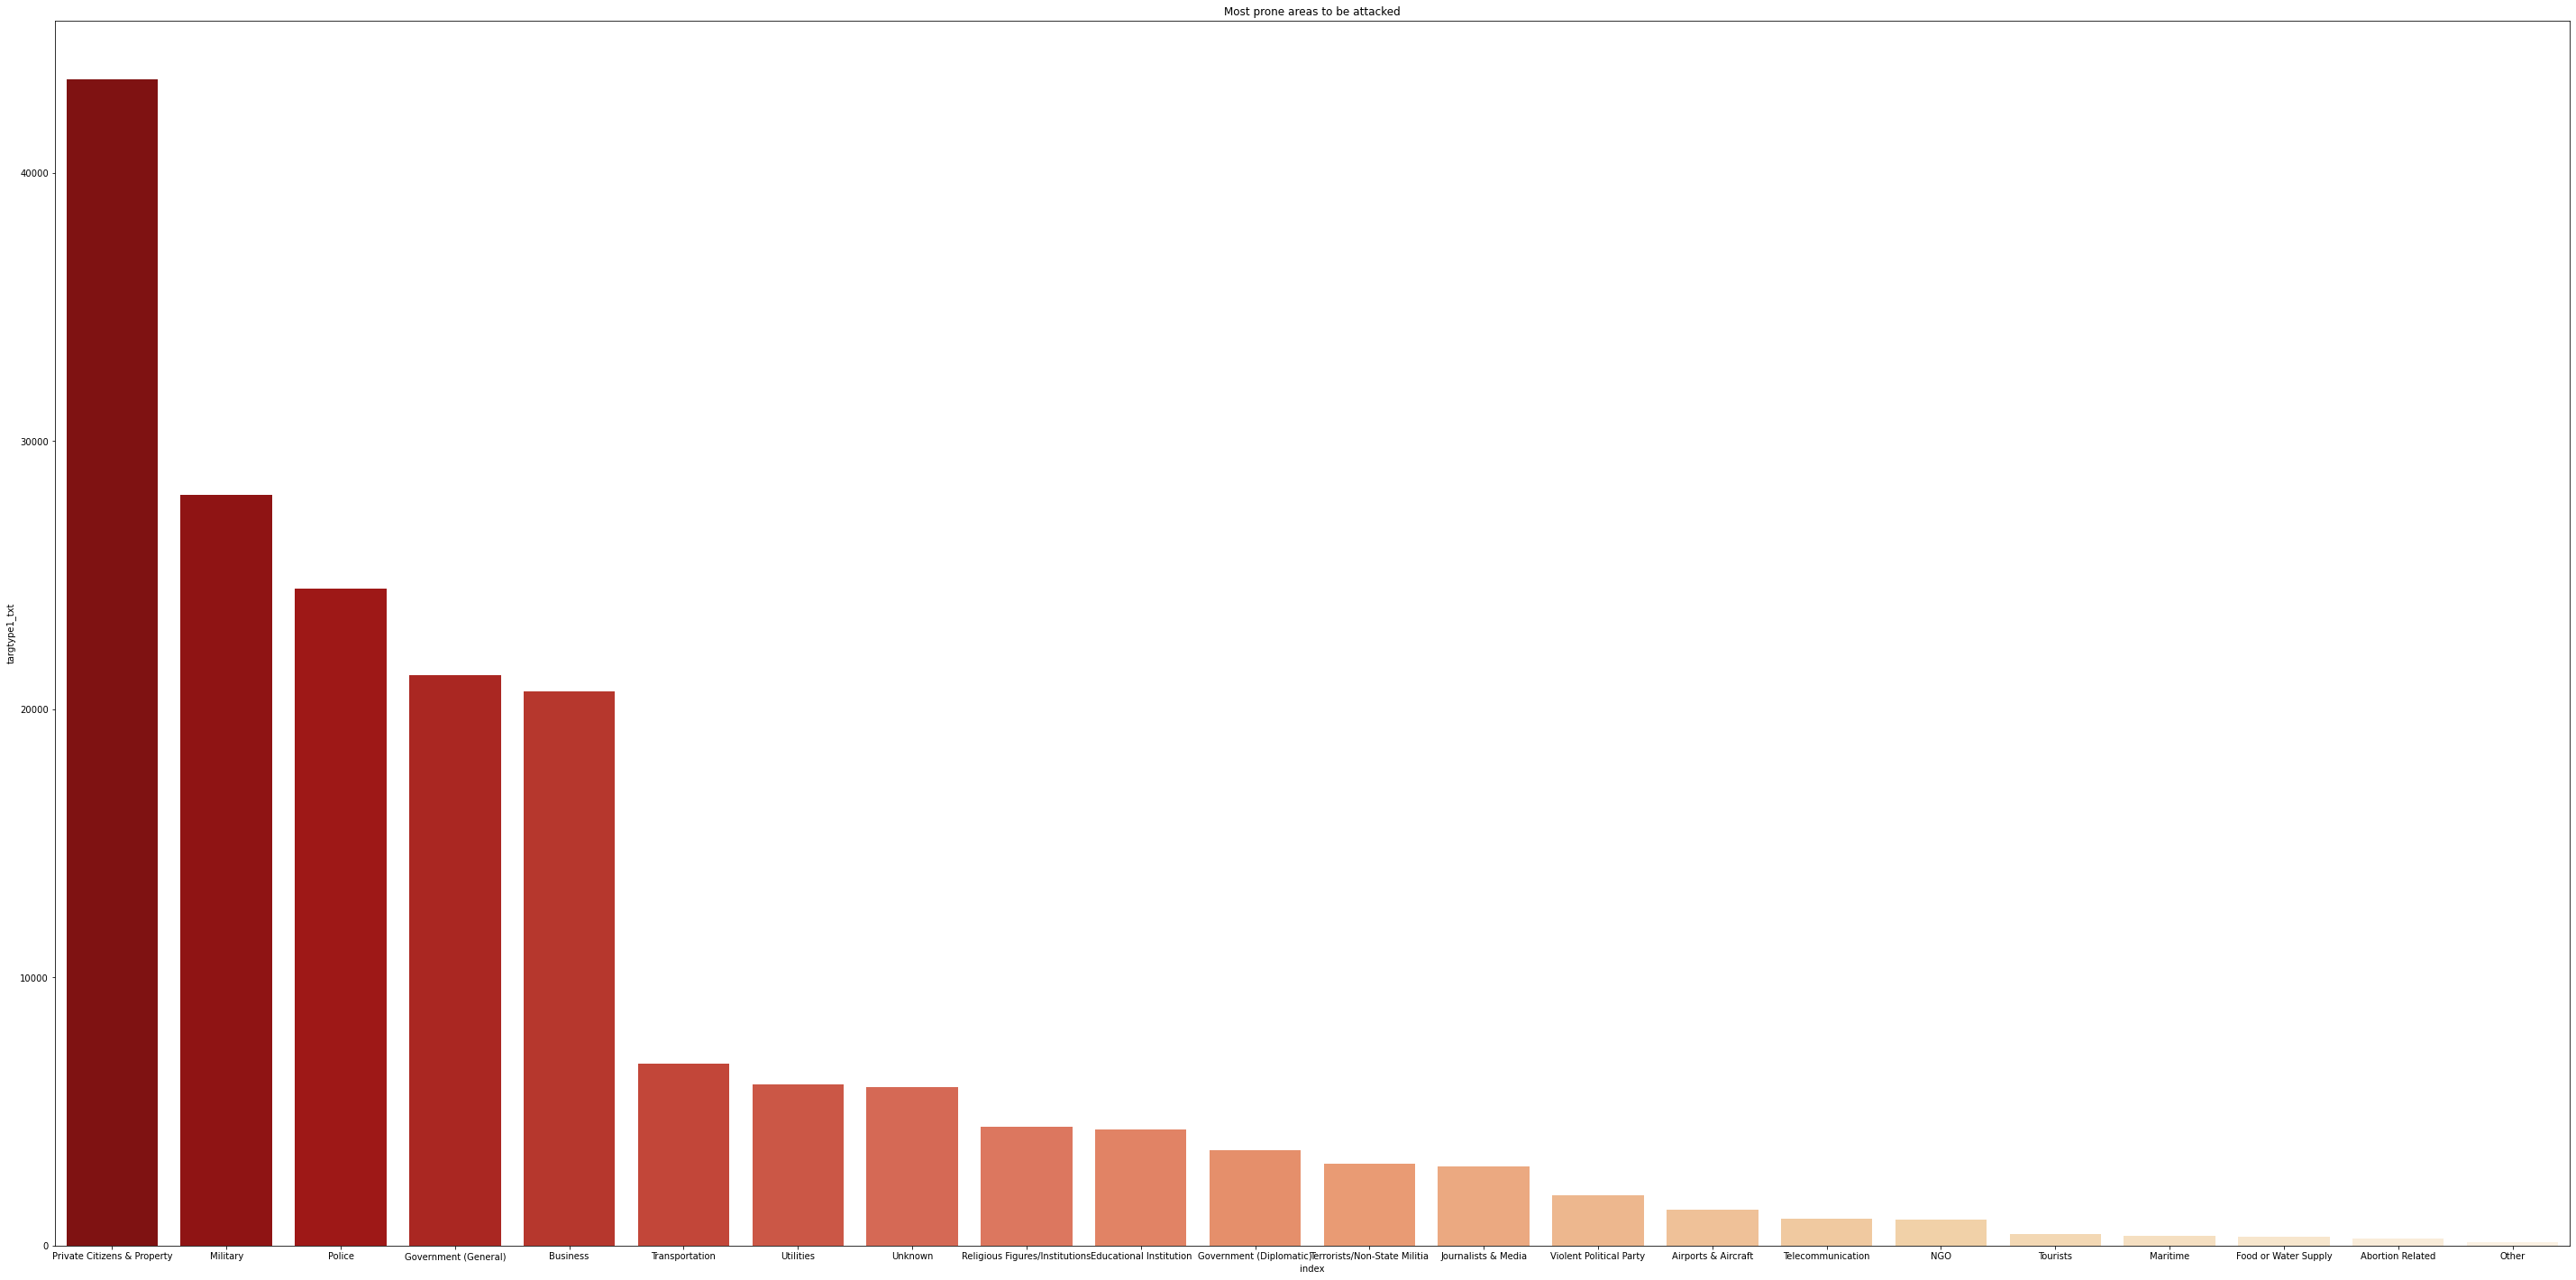

In [47]:
plt.figure(figsize=(50,25))
sns.barplot(x=target['index'],y=target['targtype1_txt'],palette='OrRd_r')
plt.title('Most prone areas to be attacked')

Most of the terrorist attack a private property or a military area

Text(0.5, 1.0, 'Most active terror group')

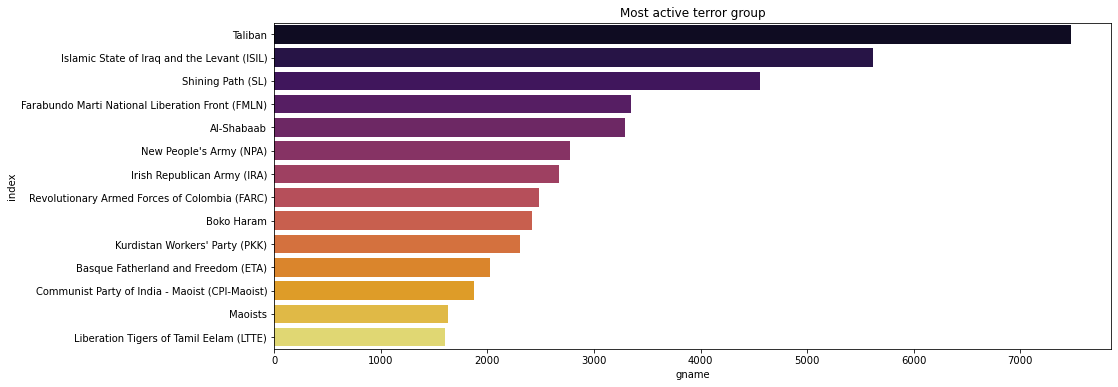

In [48]:
gang = df.gname.value_counts()[1:15].reset_index()
plt.figure(figsize=(15,6))
sns.barplot(y=gang['index'],x=gang['gname'],palette='inferno')
plt.title('Most active terror group')

Taliban are the most active terror group in the world followed by ISIL and SL

Text(0.5, 1.0, 'Most used wepons')

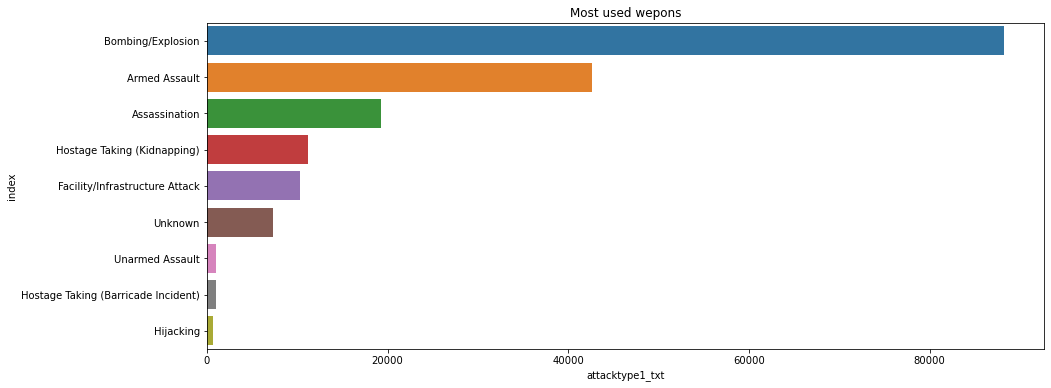

In [49]:
plt.figure(figsize=(15,6))
ack_type = df.attacktype1_txt.value_counts()[:15].reset_index()
sns.barplot(y=ack_type['index'],x=ack_type['attacktype1_txt'])
plt.title('Most used wepons')

Most of the attack include explosion and armed assualts

Text(0.5, 1.0, 'Most Killings')

<Figure size 1080x432 with 0 Axes>

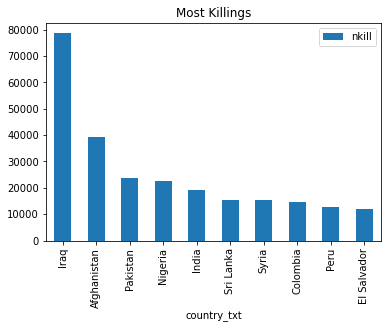

In [42]:
plt.figure(figsize=(15,6))
pd.DataFrame(df.groupby('country_txt')['nkill'].sum().sort_values(ascending=False))[:10].plot(kind='bar')
plt.title('Most Killings')

From the Graph we can say that Iraq is most affected country by terrorism 

**Iraq,Pakistan and Afghanistan** are most affected country from terrorism

**Iraq** has almost **80000** people killed 

**Taliban** is the most active Terror group

Most of the times in a attack **Bombs and explosive** are used

Over the years Terrorism has increased a lot